# **All in one Classification Model**

*Data Preprocessing*


Importing the libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

Importing the dataset

In [6]:
dataset = pd.read_csv('Predicting_Purchaser.csv')
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


Splitting the dataset into Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 0)

Feature scaling 


In [8]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train  = sc_X.fit_transform(X_train)
X_test  = sc_X.transform(X_test)

Here, I made a function that will take the X_train, y_train and X_test values and will give the dictionary of predicted values of y and every model selection will be done within the model dict.

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier


def get_classification_models(X_train, y_train,X_test):
    models = {
        'Logistic Regression': LogisticRegression(),
         'Decision Tree': DecisionTreeClassifier(),
         'Random Forest': RandomForestClassifier(),
         'Support Vector Machine': SVC(),
         'K-Nearest Neighbors': KNeighborsClassifier(),
         'Naive Bayes': GaussianNB(),
         'Multi-layer Perceptron': MLPClassifier()
        }
    y_preds ={}

    for model_name, model in models.items():
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            y_preds[model_name] = y_pred

    return y_preds,models


y_preds,models= get_classification_models(X_train, y_train,X_test)
models


C:\Users\HP ELITEBOOK\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'Logistic Regression': LogisticRegression(),
 'Decision Tree': DecisionTreeClassifier(),
 'Random Forest': RandomForestClassifier(),
 'Support Vector Machine': SVC(),
 'K-Nearest Neighbors': KNeighborsClassifier(),
 'Naive Bayes': GaussianNB(),
 'Multi-layer Perceptron': MLPClassifier()}

Making the Confusion Matrix Dictionary

In [10]:
from sklearn.metrics import confusion_matrix

def get_confusion_matrix_dict(y_true, y_preds):
    confusion_matrix_dict = {}
    for model_name, y_pred in y_preds.items():
        cm = confusion_matrix(y_true, y_pred)
        confusion_matrix_dict[model_name] = cm
    return confusion_matrix_dict

confusion_matrix = get_confusion_matrix_dict(y_test, y_preds)
confusion_matrix


{'Logistic Regression': array([[65,  3],
        [ 8, 24]], dtype=int64),
 'Decision Tree': array([[62,  6],
        [ 3, 29]], dtype=int64),
 'Random Forest': array([[64,  4],
        [ 4, 28]], dtype=int64),
 'Support Vector Machine': array([[64,  4],
        [ 3, 29]], dtype=int64),
 'K-Nearest Neighbors': array([[64,  4],
        [ 3, 29]], dtype=int64),
 'Naive Bayes': array([[65,  3],
        [ 7, 25]], dtype=int64),
 'Multi-layer Perceptron': array([[64,  4],
        [ 3, 29]], dtype=int64)}

Visualizing all the confusion matrices in the same figure using subplots

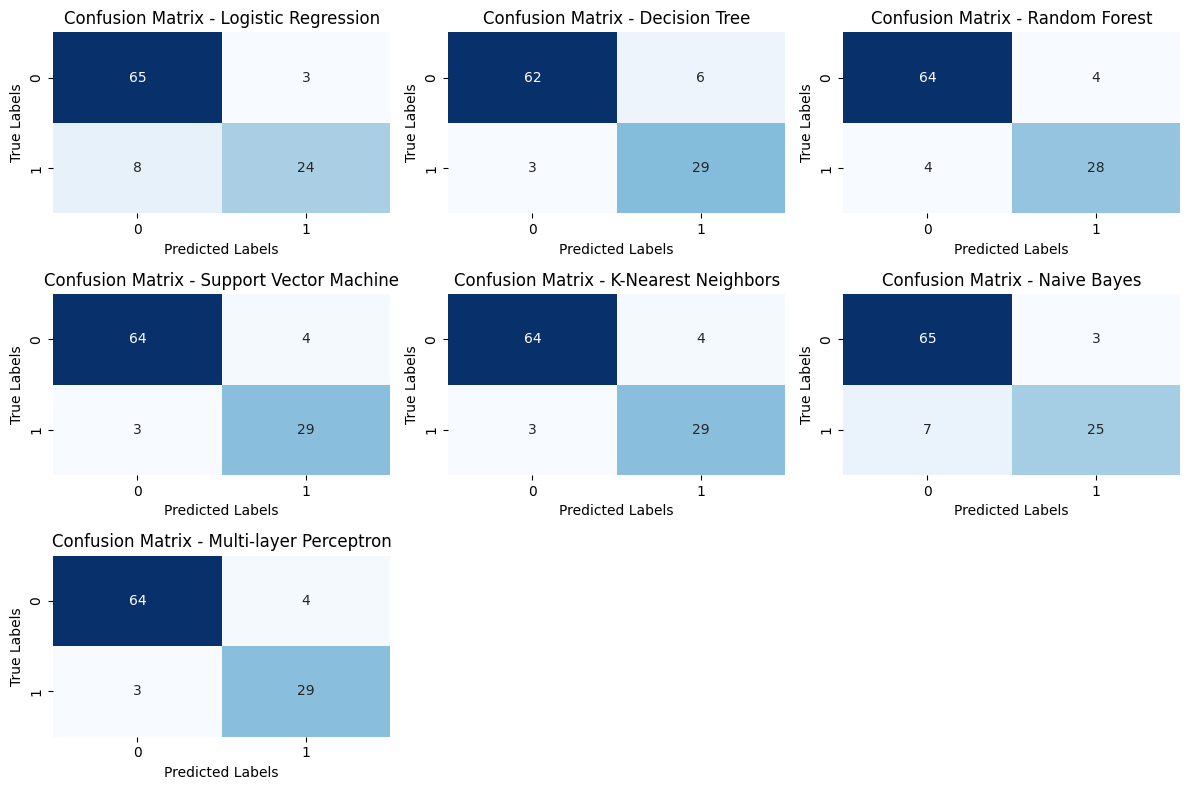

In [11]:

plt.figure(figsize=(12, 8))
num_plots = len(confusion_matrix)
cols = 3
rows = (num_plots + cols - 1) // cols

for idx, (model_name, cm) in enumerate(confusion_matrix.items(), 1):
    plt.subplot(rows, cols, idx)
    sn.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')

plt.tight_layout()
plt.show()

Visualizing the Training set Results

C:\Users\HP ELITEBOOK\AppData\Local\Temp\ipykernel_20416\2844846586.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
C:\Users\HP ELITEBOOK\AppData\Local\Temp\ipykernel_20416\2844846586.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
C:\Users\HP ELITEBOOK\AppData\Local\Temp\ipykernel_20416\2844846586.py:10:

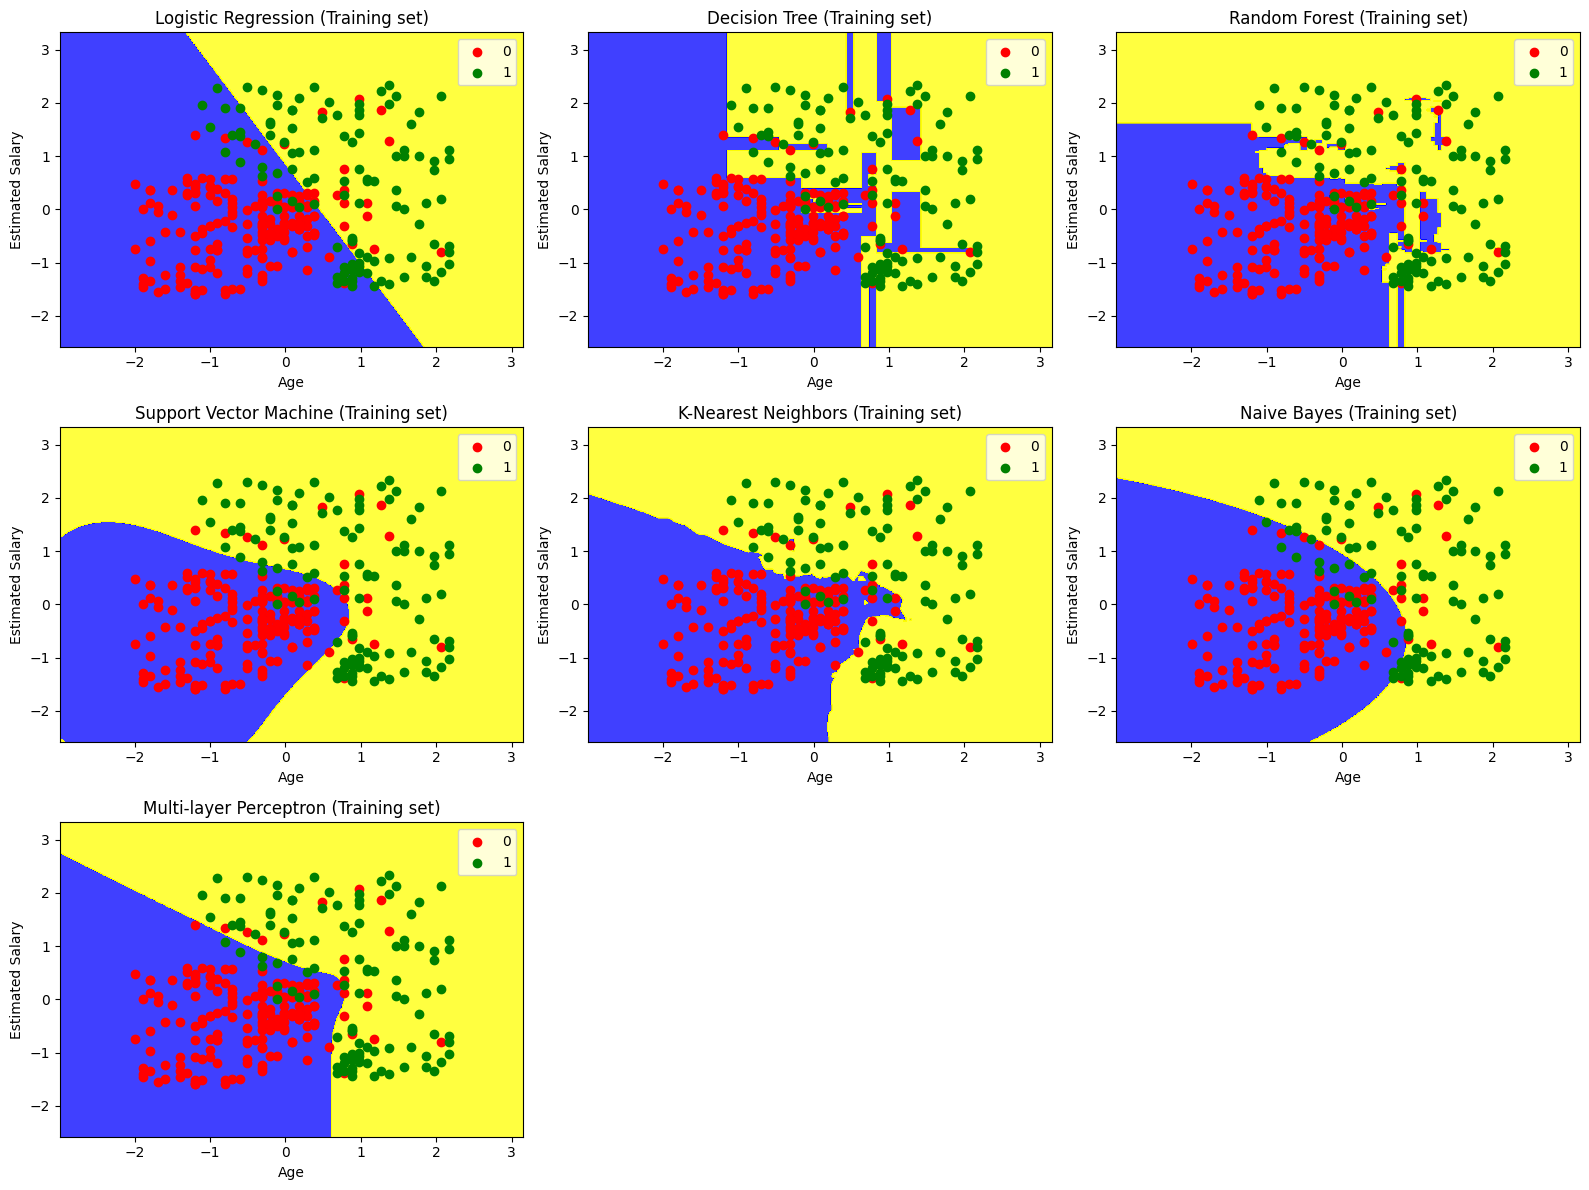

In [12]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, X_set, y_set, title, cmap1,cmap2):
    plt.contourf(X1, X2, model.predict(np.c_[X1.ravel(), X2.ravel()]).reshape(X1.shape),
                 alpha=0.75, cmap=cmap1)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c=cmap2(i), label=j)

    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()


# Create a figure with all the decision boundary plots for each model
plt.figure(figsize=(16, 12))
num_plots = len(confusion_matrix)
cols = 3  # Number of columns for subplots
rows = (num_plots + cols - 1) // cols  # Calculate the number of rows for subplots

# Create the meshgrid once outside the loop to avoid recomputation for each model
X1, X2 = np.meshgrid(np.arange(start=X_train[:, 0].min() - 1, stop=X_train[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_train[:, 1].min() - 1, stop=X_train[:, 1].max() + 1, step=0.01))

# Define the colormap once outside the loop
cmap1 = ListedColormap(('blue', 'yellow'))
cmap2 = ListedColormap(('red', 'green'))

for idx, (model_name, cm) in enumerate(confusion_matrix.items(), 1):
    plt.subplot(rows, cols, idx)
    plot_decision_boundary(models[model_name], X_train, y_train, title=f'{model_name} (Training set)', cmap1=cmap1,cmap2=cmap2)

plt.tight_layout()
plt.show()


Visualizing the Test set Results

C:\Users\HP ELITEBOOK\AppData\Local\Temp\ipykernel_20416\3943821634.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
C:\Users\HP ELITEBOOK\AppData\Local\Temp\ipykernel_20416\3943821634.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
C:\Users\HP ELITEBOOK\AppData\Local\Temp\ipykernel_20416\3943821634.py:10:

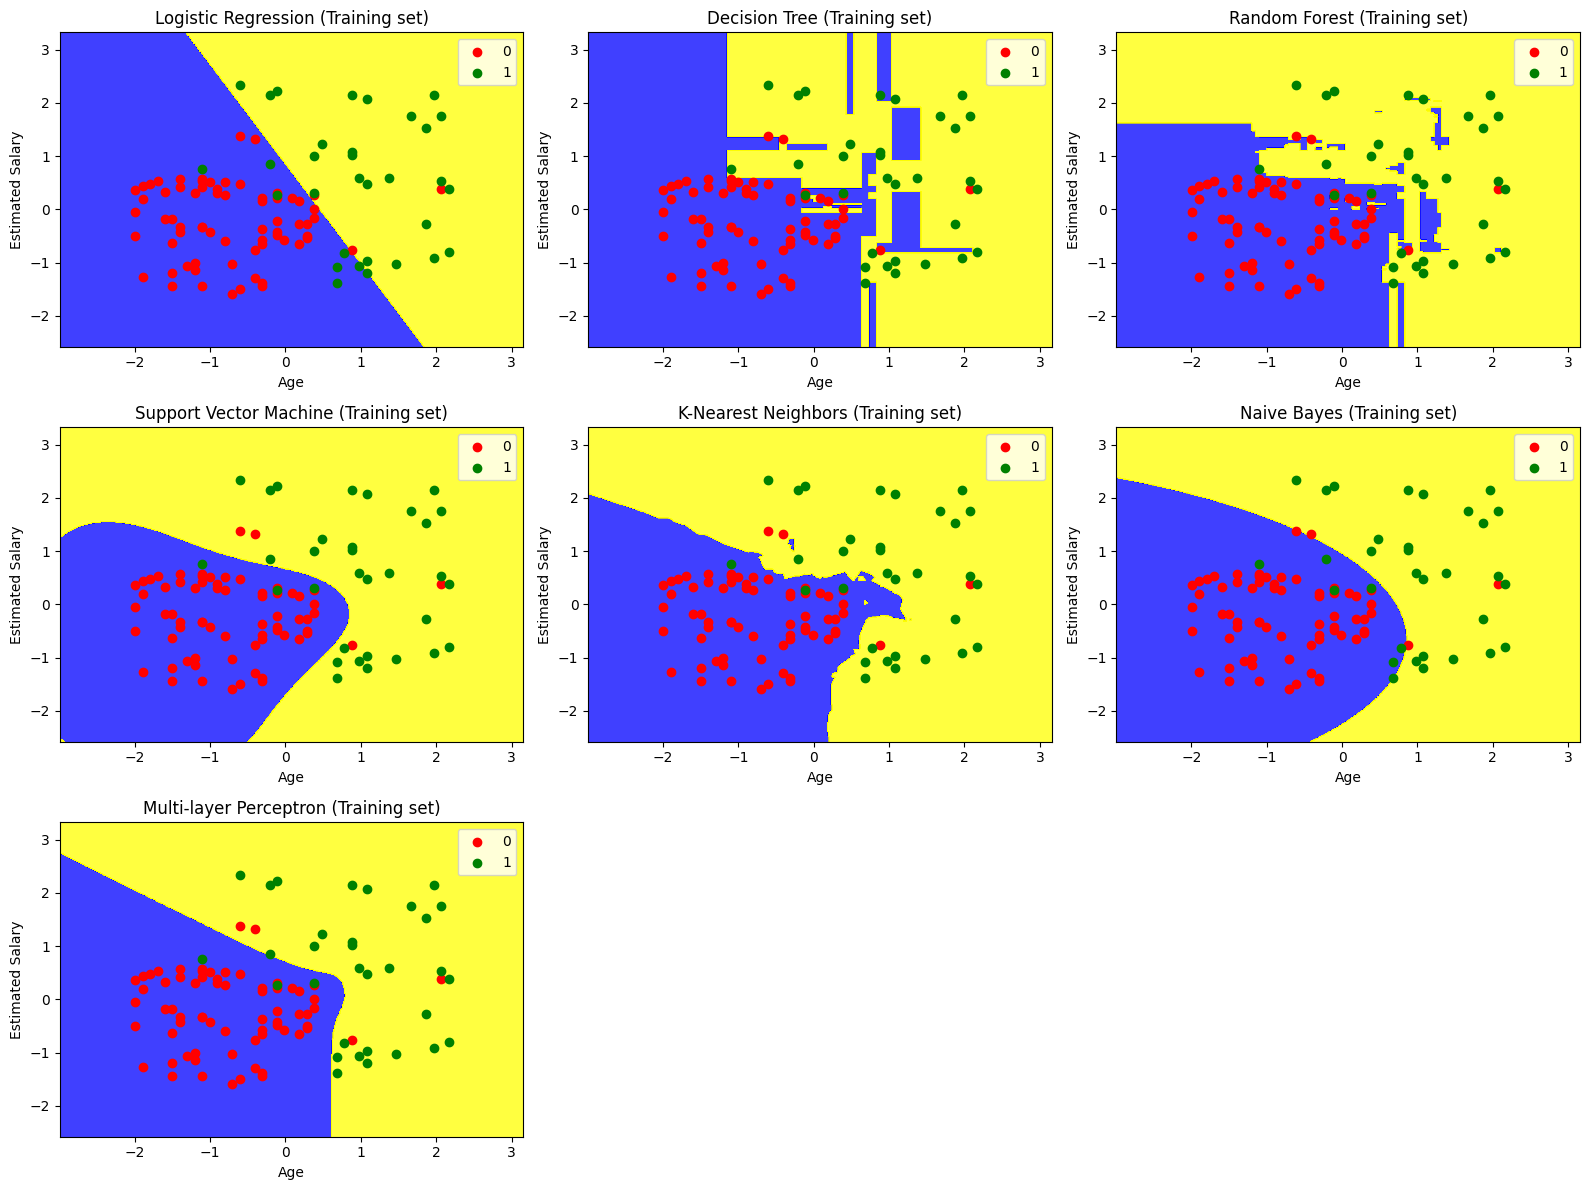

In [13]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, X_set, y_set, title, cmap1,cmap2):
    plt.contourf(X1, X2, model.predict(np.c_[X1.ravel(), X2.ravel()]).reshape(X1.shape),
                 alpha=0.75, cmap=cmap1)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c=cmap2(i), label=j)

    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()


# Create a figure with all the decision boundary plots for each model
plt.figure(figsize=(16, 12))
num_plots = len(confusion_matrix)
cols = 3  # Number of columns for subplots
rows = (num_plots + cols - 1) // cols  # Calculate the number of rows for subplots

# Create the meshgrid once outside the loop to avoid recomputation for each model
X1, X2 = np.meshgrid(np.arange(start=X_train[:, 0].min() - 1, stop=X_train[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_train[:, 1].min() - 1, stop=X_train[:, 1].max() + 1, step=0.01))

# Define the colormap once outside the loop
cmap1 = ListedColormap(('blue', 'yellow'))
cmap2 = ListedColormap(('red', 'green'))

for idx, (model_name, cm) in enumerate(confusion_matrix.items(), 1):
    plt.subplot(rows, cols, idx)
    plot_decision_boundary(models[model_name], X_test, y_test, title=f'{model_name} (Training set)', cmap1=cmap1,cmap2=cmap2)

plt.tight_layout()
plt.show()
